In [194]:
%load_ext autoreload
%autoreload 2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from rk4 import rk4
from wd_setup import WhiteDwarf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
M_SOLAR = 1.98e33

1.0000000000223281
1.0000001298523902
1.0000001298523775
1.0000000649289673
1.0000000649289746
1.0000000432878475
1.0000000432878495
1.0000000324673017
1.0000000324673015
1.0000000259749955
1.0000000259749957
1.0000000216468208
1.0000000216468208
1.000000018555303
1.0000000185553033
1.0000000162367078
1.0000000162367078
1.0000000144334051
1.0000000144334051
1.0000000129908195
1.0000000129908195
1.0000000118105856
1.0000000118105856
1.0000000108271272
1.0000000108271272
1.000000009995047
1.000000009995047
1.0000000092819195
1.0000000092819195
1.0000000086639667
1.0000000086639667
1.0000000081233555
1.0000000081233555
1.0000000076464504
1.0000000076464504
1.0000000072226465
1.0000000072226465
1.0000000068435715
1.0000000068435715
1.0000000065025298
1.0000000065025298
1.0000000061941006
1.0000000061941006
1.0000000059138496
1.0000000059138496
1.0000000056581146
1.0000000056581146
1.0000000054238438
1.0000000054238438
1.0000000052084748
1.0000000052084748
1.0000000050098397
1.0000000050098

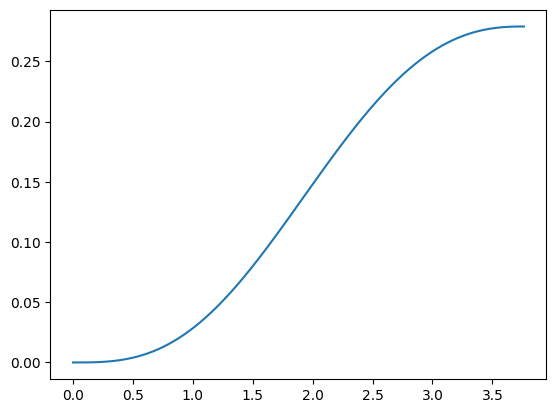

In [ ]:
rhoc_scaled = 1e6
Ye = 0.5

wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled)

# Initial conditions
r = 1e-10
state = np.array([rhoc_scaled, 0]) # [density, mass]
dr = 1e-3

R_history = []
M_history = []
rho_history = []

while state[0] > 1e-10:
    R_history.append(r)
    rho_history.append(state[0])
    M_history.append(state[1])
    
    state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
    
    r += dr

R_history = np.array(R_history)
M_history = np.array(M_history)
rho_history = np.array(rho_history)

plt.plot(R_history, M_history)

In [239]:
M_history[-1]

0.2798243655012628

In [250]:
M = []
R = []
dr=1e-3

rhoc_scaled = np.logspace(-1, 7, 100)
for rhoc in tqdm(rhoc_scaled):

    wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled)

    # Initial conditions
    r = 1e-10
    state = np.array([rhoc, (1/3) * rhoc * (r ** 3)]) # [density, mass, pressure]

    while state[0] > 1e-10:
        state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
        
        r += dr

    R.append(r)
    if np.isnan(state[1]):
        print(rhoc)
    M.append(state[1])

R = np.array(R)
M = np.array(M)

plt.scatter(R * wd1.R0 / (1000 * 100), M * wd1.M0 / M_SOLAR)
plt.xlabel("R (km)")
plt.ylabel(r"M ($M_\odot$)")

  1%|          | 1/100 [00:00<00:14,  6.70it/s]

1.0000000000223281
1.0000001298523902
1.0000001298523775
1.0000000649289673
1.0000000649289746
1.0000000432878475
1.0000000432878495
1.0000000324673017
1.0000000324673015
1.0000000259749955
1.0000000259749957
1.0000000216468208
1.0000000216468208
1.000000018555303
1.0000000185553033
1.0000000162367078
1.0000000162367078
1.0000000144334051
1.0000000144334051
1.0000000129908195
1.0000000129908195
1.0000000118105856
1.0000000118105856
1.0000000108271272
1.0000000108271272
1.000000009995047
1.000000009995047
1.0000000092819195
1.0000000092819195
1.0000000086639667
1.0000000086639667
1.0000000081233555
1.0000000081233555
1.0000000076464504
1.0000000076464504
1.0000000072226465
1.0000000072226465
1.0000000068435715
1.0000000068435715
1.0000000065025298
1.0000000065025298
1.0000000061941006
1.0000000061941006
1.0000000059138496
1.0000000059138496
1.0000000056581146
1.0000000056581146
1.0000000054238438
1.0000000054238438
1.0000000052084748
1.0000000052084748
1.0000000050098397
1.0000000050098

  3%|▎         | 3/100 [00:00<00:16,  5.85it/s]

1.0000487962711448
1.0000487962672215
1.0000487905375235
1.000048790537519
1.0000487848056012
1.0000487848016848
1.0000487790675674
1.000048779067563
1.000048773331233
1.0000487733273236
1.000048767588802
1.0000487675887975
1.0000487618480711
1.0000487618441685
1.000048756101258
1.0000487561012537
1.000048750356146
1.0000487503522504
1.0000487446049666
1.0000487446049622
1.000048738855489
1.0000487388516004
1.0000487330999586
1.0000487330999541
1.0000487273461307
1.000048727342249
1.0000487215862646
1.0000487215862601
1.000048715828102
1.000048715824227
1.000048710063916
1.0000487100639115
1.000048704301434
1.0000487042975663
1.0000486985329433
1.0000486985329389
1.000048692766158
1.0000486927622971
1.0000486869933782
1.0000486869933738
1.0000486812223046
1.0000486812184506
1.0000486754452513
1.000048675445247
1.0000486696699051
1.0000486696660582
1.0000486638885941
1.0000486638885897
1.0000486581089907
1.0000486581051509
1.0000486523234375
1.000048652323433
1.0000486465395926
1.000048

  4%|▍         | 4/100 [00:00<00:15,  6.32it/s]

1.0000000000314797
1.0000001298546788
1.0000001298546661
1.0000000649312624
1.0000000649312697
1.0000000432901588
1.0000000432901606
1.0000000324696445
1.0000000324696443
1.0000000259773902
1.0000000259773905
1.0000000216492932
1.000000021649293
1.0000000185578835
1.0000000185578837
1.0000000162394322
1.0000000162394322
1.0000000144363146
1.0000000144363146
1.0000000129939597
1.0000000129939597
1.0000000118140078
1.0000000118140078
1.0000000108308875
1.0000000108308875
1.000000009999207
1.000000009999207
1.0000000092865458
1.0000000092865458
1.0000000086691303
1.0000000086691303
1.0000000081291331
1.0000000081291331
1.000000007652924
1.0000000076529243
1.0000000072299031
1.0000000072299031
1.0000000068517032
1.0000000068517032
1.0000000065116335
1.0000000065116335
1.0000000062042782
1.0000000062042782
1.000000005925209
1.000000005925209
1.0000000056707679
1.0000000056707679
1.0000000054379086
1.0000000054379086
1.0000000052240738
1.0000000052240738
1.0000000053660734
1.0000000053666775

  6%|▌         | 6/100 [00:00<00:13,  7.00it/s]

1.000063801188412
1.0000637915335508
1.0000637915326884
1.0000637818799887
1.0000637818799532
1.0000637722293109
1.0000637722285484
1.00006376258018
1.0000637625801385
1.0000637529339242
1.0000637529332765
1.000063743289473
1.0000637432894208
1.0000637336478824
1.0000637336473746
1.000063724008439
1.0000637240083594
1.0000637143718227
1.00006371437168
1.000063704737915
1.0000000000393678
1.000000129856652
1.0000001298566399
1.0000000649332441
1.0000000649332512
1.0000000432921625
1.0000000432921645
1.0000000324716918
1.0000000324716913
1.0000000259795088
1.000000025979509
1.0000000216515181
1.0000000216515181
1.000000018560257
1.0000000185602573
1.0000000162420033
1.0000000162420033
1.0000000144391392
1.0000000144391394
1.0000000129971016
1.0000000129971016
1.0000000118175365
1.0000000118175365
1.0000000108348808
1.0000000108348808
1.0000000100037485
1.0000000100037485
1.0000000092917267
1.0000000092917267
1.0000000086750491
1.0000000086750491
1.0000000081358953
1.0000000081358953
1.00

  7%|▋         | 7/100 [00:01<00:13,  6.85it/s]


1.0000912789274174
1.0000912877858612
1.0000912877732644
1.0000912966147075
1.00009129661469
1.00009130543909
1.0000913054264784
1.0000913142338825
1.000091314233865
1.0000913230242303
1.0000913230116042
1.0000913317849782
1.0000913317849607
1.0000913405413001
1.0000913405286591
1.0000913492680121
1.0000913492679946
1.0000913579903177
1.0000913579776622
1.0000913666830031
1.0000913666829856
1.0000913753713014
1.0000913753586316
1.0000913840299697
1.0000913840299521
1.0000913926842703
1.0000913926715858
1.0000914013089306
1.000091401308913
1.0000914099292426
1.0000914099165434
1.0000914185199048
1.0000914185198873
1.0000914271062373
1.000091427093524
1.0000914356629105
1.000091435662893
1.0000914442152733
1.0000914442025457
1.0000914527379676
1.00009145273795
1.0000914612563705
1.0000914612436285
1.0000914697450947
1.0000914697450773
1.000091478229547
1.000091478216791
1.0000914866843118
1.0000914866842943
1.000091495134823
1.0000914951220528
1.0000915035556375
1.00009150355562
1.000091

KeyboardInterrupt: 

100%|██████████| 70/70 [00:00<00:00, 535.41it/s]


Text(0, 0.5, 'M ($M_\\odot$)')

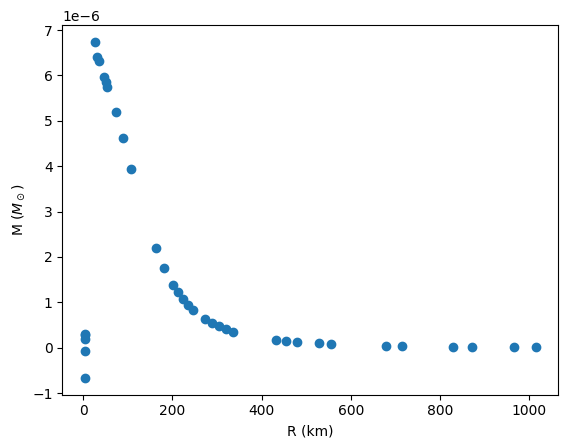

In [198]:
M = []
R = []
dr=1e-3

rhoc_scaled = np.logspace(-5, 4, 70)
for rhoc in tqdm(rhoc_scaled):

    wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled)

    # Initial conditions
    r = 1e-10
    state = np.array([rhoc, (1/3) * rhoc * (r ** 3)]) # [density, mass, pressure]

    while state[0] > 0:
        state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
        
        r += dr

    R.append(r)
    M.append(state[1])

R = np.array(R)
M = np.array(M)

plt.scatter(R[1:] * wd1.R0 / (1000 * 100), M[1:] * wd1.M0 / M_SOLAR)
plt.xlabel("R (km)")
plt.ylabel(r"M ($M_\odot$)")